In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_excel (r'BASE DE DATOS TESIS ACNE.xlsx')

In [4]:
df = df.drop(df.index[[9,10]])

In [5]:
df

,Registro,Apellido1,Apellido2,Nombre,Fecha de nacimiento,Edad,Sexo,Sesiones Previas,Antecedente familiar,Unnamed: 9,...,SCARS inicial,SCARS fin,ECCA inicial,ECCA final,FASQOL inicial,FASQOL fin,UDE basal,UDE control,DERMIS basal,DERMIS control
0,794818,García,del Motte,Melissa,NaN,18.0,0,NaN,NaN,NaN,...,3.0,3.0,110.0,110.0,NaN,NaN,41.6,20.8,67.7,62.50
1,860605,Valencia,NaN,Alejandro,NaN,15.0,1,NaN,NaN,NaN,...,4.0,3.0,210.0,190.0,NaN,NaN,45.7,37.1,91.4,68.00
2,859534,Hernandez,Buendia,Maria Fernanda,NaN,13.0,0,NaN,,NaN,...,3.0,3.0,90.0,75.0,NaN,NaN,67.7,57.8,114.5,94.40
3,854585,Arenas,Dominguez,Andres,NaN,17.0,1,NaN,NaN,NaN,...,4.0,3.0,165.0,120.0,NaN,NaN,212.8,169.7,285.8,201.30
4,801512,Islas,Mora,Maria Fernanda,NaN,17.0,0,NaN,NaN,NaN,...,3.0,3.0,90.0,75.0,NaN,NaN,88.5,83.3,119.7,93.74
5,819207,Marín,Saavedra,Adolfo Daniel,NaN,16.0,1,NaN,NaN,NaN,...,2.0,2.0,90.0,90.0,NaN,NaN,78.1,36.4,109.3,62.50
6,839619,Hernandez,Hernandez,Nallely,NaN,17.0,0,NaN,NaN,NaN,...,3.0,2.0,95.0,65.0,NaN,NaN,57.3,57.3,124.9,83.30
7,769921,Oloarte,Garcia,Angel,,15.0,1,NaN,NaN,NaN,...,3.0,3.0,205.0,135.0,NaN,NaN,35.1,31.2,144.5,124.90
8,806358,Quinto,Gonzalez,Aldo sebastian,NaN,14.0,1,NaN,NaN,NaN,...,3.0,2.0,100.0,95.0,NaN,NaN,36.4,41.6,109.3,109.30


In [6]:
df.keys()

Index(['Registro ', 'Apellido1', 'Apellido2', 'Nombre', 'Fecha de nacimiento',
       'Edad', 'Sexo', 'Sesiones Previas', 'Antecedente familiar',
       'Unnamed: 9', 'Unnamed: 10', 'áreas afectadas', 'Unnamed: 12',
       'SCARS inicial', 'SCARS fin', 'ECCA inicial', 'ECCA final',
       'FASQOL inicial', 'FASQOL fin', 'UDE basal', 'UDE control',
       'DERMIS basal', 'DERMIS control'],
      dtype='object')

In [7]:
delta_UDE = df['UDE control']-df['UDE basal']

In [8]:
delta_DERMIS = df['DERMIS control']-df['DERMIS basal']

In [22]:
delta_SCARS = df['SCARS fin']-df['SCARS inicial']

In [23]:
delta_ECCA = df['ECCA final']-df['ECCA inicial']

# UDE

Text(0, 0.5, '-(UDE control - UDE basal)')

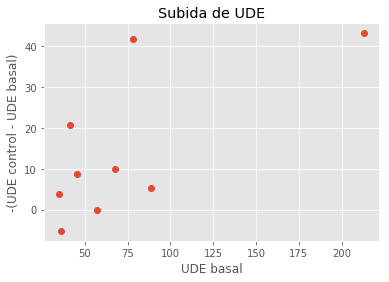

In [18]:
plt.plot(df['UDE basal'],-delta_UDE,'o')
plt.title("Subida de UDE")
plt.xlabel("UDE basal")
plt.ylabel("-(UDE control - UDE basal)")

Text(0, 0.5, '-(UDE control - UDE basal)')

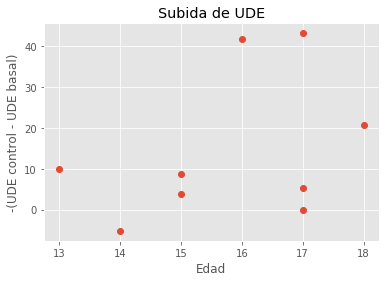

In [10]:
plt.plot(df['Edad'],-delta_UDE,'o')
plt.title("Subida de UDE")
plt.xlabel("Edad")
plt.ylabel("-(UDE control - UDE basal)")

# DERMIS

Text(0, 0.5, '-(DERMIS control - DERMIS basal)')

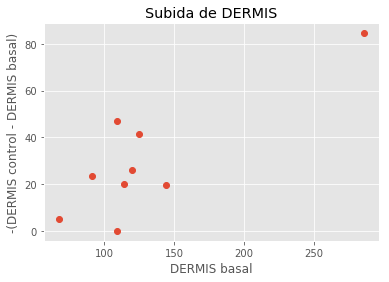

In [11]:
plt.plot(df['DERMIS basal'],-delta_DERMIS,'o')
plt.title("Subida de DERMIS")
plt.xlabel("DERMIS basal")
plt.ylabel("-(DERMIS control - DERMIS basal)")

Text(0, 0.5, '-(DERMIS control - DERMIS basal)')

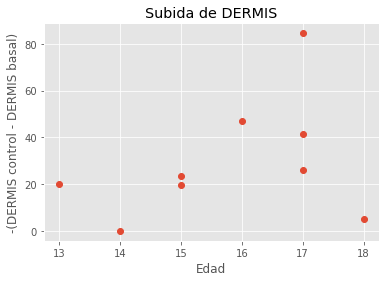

In [12]:
plt.plot(df['Edad'],-delta_DERMIS,'o')
plt.title("Subida de DERMIS")
plt.xlabel("Edad")
plt.ylabel("-(DERMIS control - DERMIS basal)")

# UDE frente a DERMIS

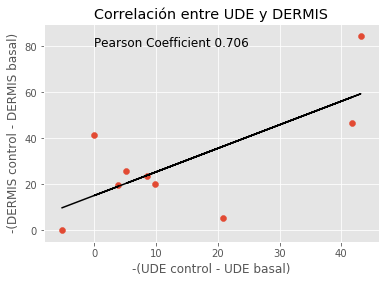

In [13]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(-np.array(delta_UDE).reshape(-1, 1), -np.array(delta_DERMIS).reshape(-1, 1))  # perform linear regression
Y_pred = linear_regressor.predict(-np.array(delta_UDE).reshape(-1,1))  # make predictions

plt.plot(-delta_UDE, Y_pred, color='black')
plt.scatter(-delta_UDE,-delta_DERMIS)
plt.title("Correlación entre UDE y DERMIS")
plt.xlabel("-(UDE control - UDE basal)")
plt.ylabel("-(DERMIS control - DERMIS basal)")
pp = stats.pearsonr(-delta_UDE,-delta_DERMIS)

plt.text(0, 80, r'Pearson Coefficient %1.3f'% pp[0], fontsize=12)
plt.show()

In [15]:
linear_regressor.coef_

array([[1.02602805]])

In [16]:
linear_regressor.intercept_

array([15.09204557])

# SCARS vs ECCA

Text(0, 0.5, 'Delat SCARS')

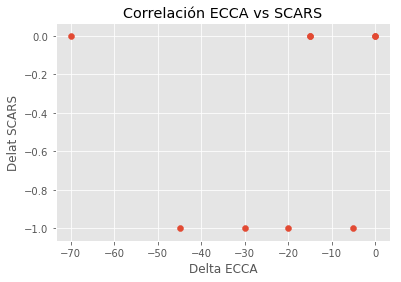

In [24]:
plt.scatter(delta_ECCA,delta_SCARS)
plt.title("Correlación ECCA vs SCARS")
plt.xlabel("Delta ECCA")
plt.ylabel("Delat SCARS")